## Resolviendo  k-Nearest Neighbors

k-Nearest Neighbors es un algoritmo muy utilizado para la clasificación, regresión y para imputar valores faltantes. Funciona muy bien cuando tienes una gran cantidad de clases y algunas muestras por clase. 
kNN en una frase: es un algoritmo que clasifica o calcula una regresión basada en los elementos del conjunto de entrenamiento que están "más cerca" de cada uno de los puntos de prueba.

k Parámetro - Tamaño del vecindario

1.	k representa la cantidad de vecinos con los que comparar datos. Es por eso que generalmente k es un número impar.
2.	Cuanto más grande es la K, menos "definidos" o más suaves son los vecindarios.

La distancia es un factor clave para determinar quién está más cerca. La distancia afecta el tamaño y las características de los vecindarios. El más utilizado es la distancia euclidiana ya que da la distancia más cercana entre 2 puntos. Distancias más comunes

1.	Euclidiano: la distancia más corta entre puntos que podrían no ser la mejor opción cuando las características están normalizadas. Normalmente se utiliza en el reconocimiento facial.
2.	Taxi o Manhattan: es la suma de las diferencias absolutas de las coordenadas cartesianas de 2 puntos. Funciona de la misma manera que cuando un automóvil necesita moverse alrededor de "bloques" para llegar al destino.
3.	Minkowski: es una mezcla de Euclidiano y Manhattan.

La cantidad de características afecta significativamente a kNN porque cuantos más puntos tengamos, más "único" se volverá cada vecindario. También afecta la velocidad porque primero necesitamos medir cada distancia para determinar quiénes son los vecinos k más cercanos.



### El algotitmo KNN<br>

__1- Dividir el conjunto de datos en entrenamiento/pruebas sets.__ El conjunto de datos debe dividirse en 2, generalmente 80-20 o 70-30%. Cada conjunto de datos debe dividirse en características (x) y etiquetas (y).<br>
__2- Crear una matriz con todos los distances.__ El tamaño de la matriz es i*j donde i=rows en el conjunto de entrenamiento y j=rows en el conjunto de pruebas.<br>
__3- Ordenar la matriz por columns.__ Al ordenar cada columna podemos determinar qué puntos (filas en el conjunto de entrenamiento) están más cerca de los puntos del conjunto de prueba (representados en columnas).<br>
__4- Obtenga los índices de los k primeros neighbors.__ Encuentre los puntos en el conjunto de entrenamiento que están más cerca de los puntos de ajuste de prueba.<br>
__5- Obtener la etiqueta que más se repite en el k superior neighbors.__ Matemáticamente es el modo de las etiquetas de los k vecinos superiores.<br>
__6- Crear una nueva matriz con la etiqueta proyectada de la set.__ de prueba El tamaño de la matriz es el mismo tamaño que el y del conjunto de pruebas.<br>
__7- Calcular la precisión de la labels.__ proyectada Evaluar las diferencias entre la etiqueta proyectada de y en el conjunto de prueba con la y real del conjunto de prueba. Si la precisión es baja, podemos cambiarla modificando k.<br>
__8- Implementar algorithm.__ modelo está listo para ser desplegado. <br>



### El siguiente ejemplo se puede utilizar para resolver 'cualquier' tipo de problema kNN sin sklearn, especialmente si desea cambiar algún código fuente para adaptarlo a sus necesidades particulares.

Voy a usar el 'famoso' Iris Flower Dataset que puedes descargar en cualquier lugar. Si no conoce este conjunto de datos, puede obtener más información aquí: https://en.wikipedia.org/wiki/Iris_flower_data_set
## Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import multiprocess

### El algotitmo KNN<br>

Descargar el archivo



In [2]:
df = pd.read_csv('iris.data', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### El algotitmo KNN<br>

__1- Dividir el conjunto de datos en entrenamiento/pruebas sets.__ El conjunto de datos debe dividirse en 2, generalmente 80-20 o 70-30%. Cada conjunto de datos debe dividirse en características (x) y etiquetas (y).<br>


In [3]:
#Usar  Train-Test-Split para preparar los datos de test datasets/arrays

x = df.iloc[:, :-1]
y = pd.DataFrame(df.iloc[:, -1])

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2)

#Mostrar las caracterñisticas de los arrays
print('Conjuntos de datos:')
print('xTrain: ' + str(xTrain.shape))
print('xTest: ' + str(xTest.shape))
print('yTrain: ' + str(yTrain.shape))
print('yTest: ' + str(yTest.shape))
print("")

print(xTrain[:5].to_numpy())




Conjuntos de datos:
xTrain: (120, 4)
xTest: (30, 4)
yTrain: (120, 1)
yTest: (30, 1)

[[6.8 2.8 4.8 1.4]
 [7.2 3.  5.8 1.6]
 [6.2 2.9 4.3 1.3]
 [5.7 4.4 1.5 0.4]
 [5.  3.2 1.2 0.2]]


#### Distancias
La distancia euclidiana se calcula de la misma manera que cuando se calcula la hipotenusa en un triángulo. La distancia euclidiana sigue el teorema de Pitágoras. Tenemos coordenadas S p=(p1,p2) y q=(q1,q2), por lo que la distancia euclidiana es la raíz cuadrada de la diferencia de cada punto elevada al cuadrado:<br>

__In su forma general:__<br>
ED = SQRT((qi-pi)^2)<br>
<br>
__In su forma matricial:__<br>
ED = SQRT((qi-pi) . traspose(qi-pi))<br>

El producto de puntos de (qi-pi) y (qi-pi) transpuesto es el equivalente matricial de una función elevada al cuadrado.<br>

__With todos los términos:__<br>
pi. T(pi) + qi. T(qi) - 2(qi. T(pi) <br>

Resumen: crearemos 1 matriz para el primer término, otra matriz para el 2º término y una 3ª matriz con el término final y luego añadiremos las 2 primeras y restaremos 2 veces la 3ª matriz.



In [4]:
#Importar las funciones de  knn.py 
#El archivo  knn.py tiene que estar en el mismo directorio que el principal
# from knn import knn_predictions
# from knn import knn_accuracy
from knn import knn_predecir
from knn import knn_precision

In [5]:
#Desde  sklearn.neighbors importamos el clasificador KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt 

El mejor valor para K es: 1 con una precisión de 1.0


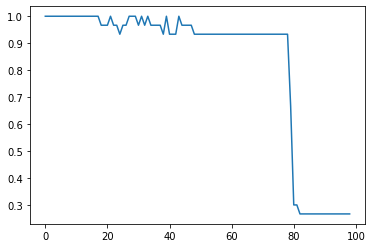

In [6]:
#Buscamos el mejor valor para K 15 iteraciones
Ks = 100
# Calcular la matriz de confusión;
precisions = np.array([accuracy_score(yTest, knn_predecir(xTrain, yTrain, xTest, i)) for i in np.arange(1, Ks)])
maxK = precisions.argmax() + 1
print("El mejor valor para K es: " + str(maxK) + " con una precisión de " + str(precisions[maxK - 1]))
plt.plot(precisions)

In [7]:
#La función knn_predictions llamará a knn_distances y traerá de vuelta la predicción basada en la distancia y el tamaño de k.
predictions = knn_predecir(xTrain, yTrain, xTest, maxK)
predictions

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa'], dtype='<U21')

In [8]:
#LLamaremos  a  knn_accuracy ( escrito en knn.py )
knn_precision(yTest, predictions)

100.0

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(yTest, predictions)
ConfusionMatrixDisplay(cm, display_labels=np.unique(predictions)).plot()

TypeError: ConfusionMatrixDisplay.__init__() got an unexpected keyword argument 'cmap'

### Resumen y conclusiones
- KNN funciona muy bien cuando algunas características realmente pueden diferenciar cada vecindario. Demasiadas características, especialmente las que agregan ruido, hacen que kNN tenga malos resultados y ralentizará los cálculos. 
 - Puede utilizar este modelo matemático para generar y evaluar cualquier modelo knn.
 - Funciona muy bien cuando tienes una gran cantidad de clases y algunas muestras por clase.
